# Приоритизация гипотез и A/B-тесты

## Описание проекта

Проект состоит из трех частей. В первой части мы обработаем массивы с данными. Во второй части, с помощью методов ICE и RICE приоритизируем гипотезы. В третьей части мы проведем анализ данных с результатами A/B-теста.

Проект выстроен следующим образом:
1. Подключение библиотек и считывание файлов в переменные;
2. Предобработка данных (проверка пропусков, дубликатов);
3. Формирование массива с данными для последующего анализа;
4. Построение графиков;
5. Анализ выбросов;
6. Расчет статистической значимости по "сырым" и "очищеным" данным;
7. Выводы по результатам анализа.

После каждого блока сделаны выводы по результатам A/B-тестов.


Приступим к работе.

## 1. Знакомство с данными и предобработка

Подключаем библиотеки и считываем данные.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.set_option('display.max_colwidth', None) #снимаем ограничения по выводу таблиц

visitors = pd.read_csv('C:/Users/valer/Downloads/visitors.csv') # считываем файл в переменную visits
orders = pd.read_csv('C:/Users/valer/Downloads/orders.csv') # считываем файл в переменную orders
hypothesis = pd.read_csv('C:/Users/valer/Downloads/hypothesis.csv') # считываем файл в переменную costs

Выводим общую информацию о массивах данных.

In [2]:
# общая информация о данных
visitors.info()
print()
orders.info()
print()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9

Пропусков нет. Проверим дубликаты.

In [3]:
print(visitors.duplicated().sum())
print(orders.duplicated().sum())
print(hypothesis.duplicated().sum())

0
0
0


Дубликатов нет. Проверять данные на наличие выбросов не имеет смысла, так как данный анализ будет проведен во второй части проекта с анализом результатов A/B-теста.

## 2. Приоритизация гипотез

Приведем названия столбцов к нижнему регистру для удобства обращения к ним.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower() #приводим к нижнему регистру

Проведем приоритизацию гипотез с помощью метода ICE. 

**ICE = Impact * Confidence / Efforts**

In [5]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] #считаем ICE
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)['hypothesis']) #сортируем и выводим результат

8                                                         Запустить акцию, дающую скидку на товар в день рождения
0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить во

Согласно приоритизации гипотез методом ICE, наиболее важной гипотезой стала гипотеза с запуском акции, дающей скидку на товар в день рождения.

Теперь проведем приоритизацию с помощью метода RICE.

**RICE = Reach * Impact * Confidence / Efforts**

In [6]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] #считаем RICE
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)['hypothesis']) #сортируем и выводим результат

7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
8                                                         Запустить акцию, дающую скидку на товар в день рождения
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
4                                Изменить цвет фона главной страницы, чтобы увеличить во

При применении метода RICE самой приоритетной гипотезой стала гипотеза о добавлении формы подписки на основные страницы. А наиболее приоритетная гипотеза из прошлого метода опустилась на 5 место. Данное изменение обусловлено влиянием охвата пользователей (Reach), добавление формы подписки коснется большего количества пользователей, чем скидка в день рождения.

## 3. Анализ A/B-теста

Прежде чем построить графики, соберем необходимые данные.

Для начала изменим тип данных.

In [7]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #меняем тип данных
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #меняем тип данных

Теперь поработаем с массивом visitors. Посчитаем количество пользователей ежедневно и накопительно по группам A и B.

In [8]:
#считаем количество пользователей ежедневно по группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] 
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#количество пользователей накопительно по группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#аналогичные действия для группы B

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [9]:
visitorsADaily

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756
5,2019-08-06,667
6,2019-08-07,644
7,2019-08-08,610
8,2019-08-09,617
9,2019-08-10,406


Теперь посчитаем заказы аналогично посетителям: по дням и накопительно.

In [10]:
#считаем количесвто заказов и выручку по дням для группы A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#считаем количесвто заказов и выручку накопительно для группы A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#аналогичные действия для группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


Теперь соберем массив объединим полученные таблицы.

In [11]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) #проверка

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Проведем проверку на предмет попадания пользователей в обе группы.

In [12]:
check_A = pd.DataFrame(orders.loc[orders['group']=='A','visitorId'].unique())
check_B = pd.DataFrame(orders.loc[orders['group']=='B','visitorId'].unique())
check_A.columns = ['visitorId']
check_B.columns = ['visitorId']
check_A['check'] = check_A['visitorId'].isin(check_B['visitorId'])
print('Количество пользователей, попавших в две группы:', check_A['check'].sum())

Количество пользователей, попавших в две группы: 58


58 пользователей попали и в группу A и в группу B. Посмотрим основную информацию по данным пользователей.

In [13]:
orders['check'] = orders['visitorId'].isin(check_A.loc[check_A['check']==True,'visitorId'])
orders[orders['check']==True].groupby('group', as_index=False).agg({'visitorId':'nunique','transactionId':'nunique','revenue':'sum'})

,group,visitorId,transactionId,revenue
0,A,58,89,720147
1,B,58,92,838788


В обе группы попало по 58 пользователей. В группе A было сделано 89 заказов, которые принесли около 720 тыс. рублей. В группе B было сделано на 3 заказа больше - 92, которые принесли около 840 тыс. рублей. 

Построим график кумулятивной выручки по группам.

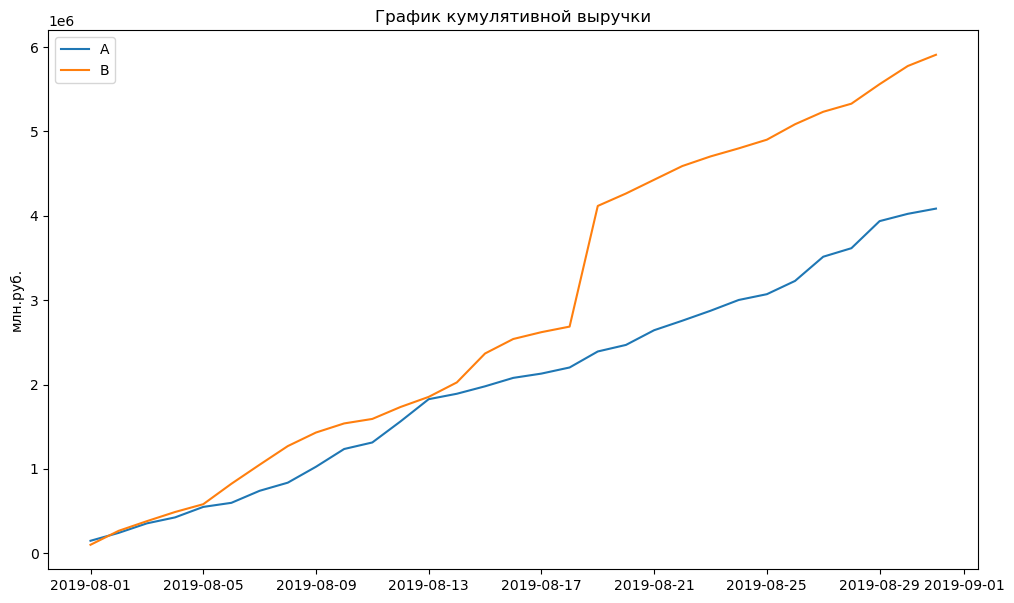

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.ylabel('млн.руб.')
plt.legend() 
plt.title('График кумулятивной выручки')
plt.show()

Кумулятивная выручка группы A растет равномерно, без видимых всплесков. Однако того же нельзя сказать о выручке группы B. До 17 августа кривые растут одновременно и равномерно, практически без различий, затем кривая группы B резко растет и дальше между линиями наблюдается большой разрыв.

Есть вероятность того, что был резкий рост по количеству заказов или был сделан заказ на большую сумму.

Построим график кумулятивного среднего чека по группам.

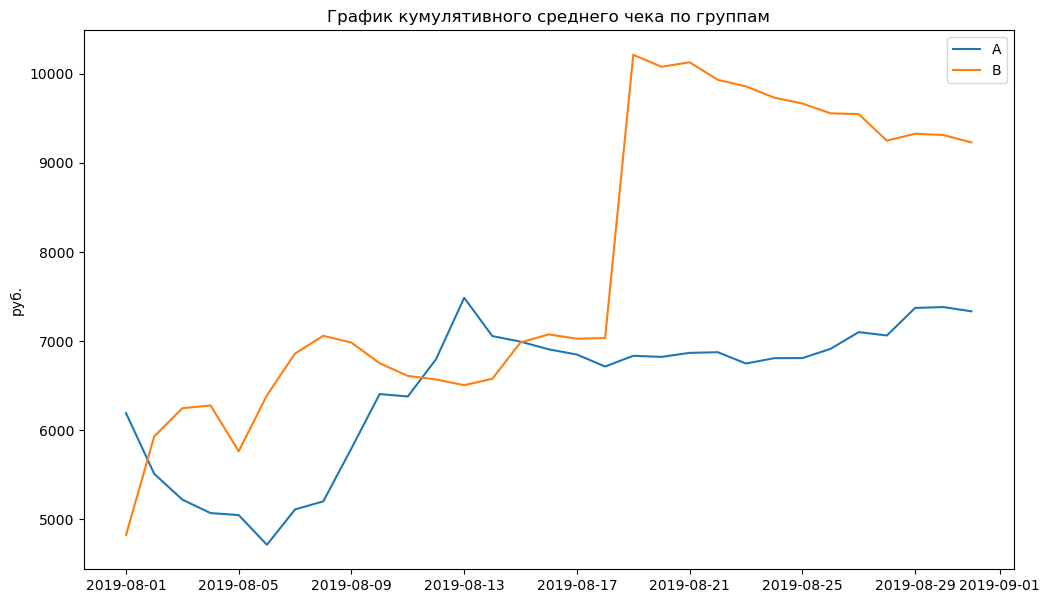

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.ylabel('руб.')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.show()

В начале заметно существенное различие между средними чеками. Возможно в группе A имело место большое количество заказов на небольшую сумму, а в группе B наоборот. Ближе к 17 августа кривые имеют тенденцию к стабилизации, однако линия группы B резко увеличивается. Это подверждает догадку о том, что имел место заказ на крупную сумму.

Построим график относительного изменения кумулятивного среднего чека.

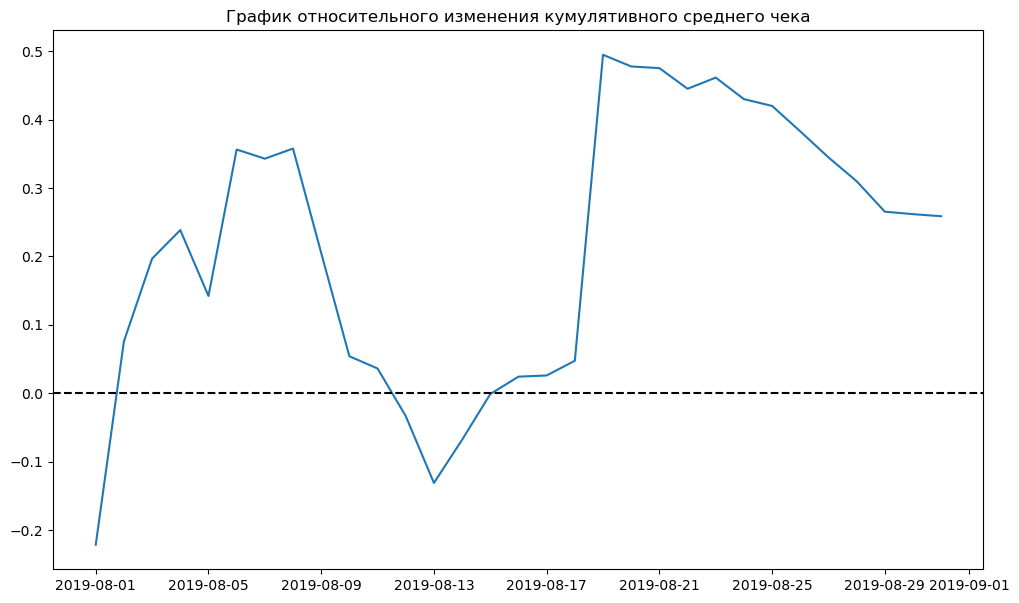

In [16]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека')
plt.show()

График имеет форму синусоиды. Значит, абсолютно точно есть выбросы.

Далее построим график кумулятивного среднего количества заказов.

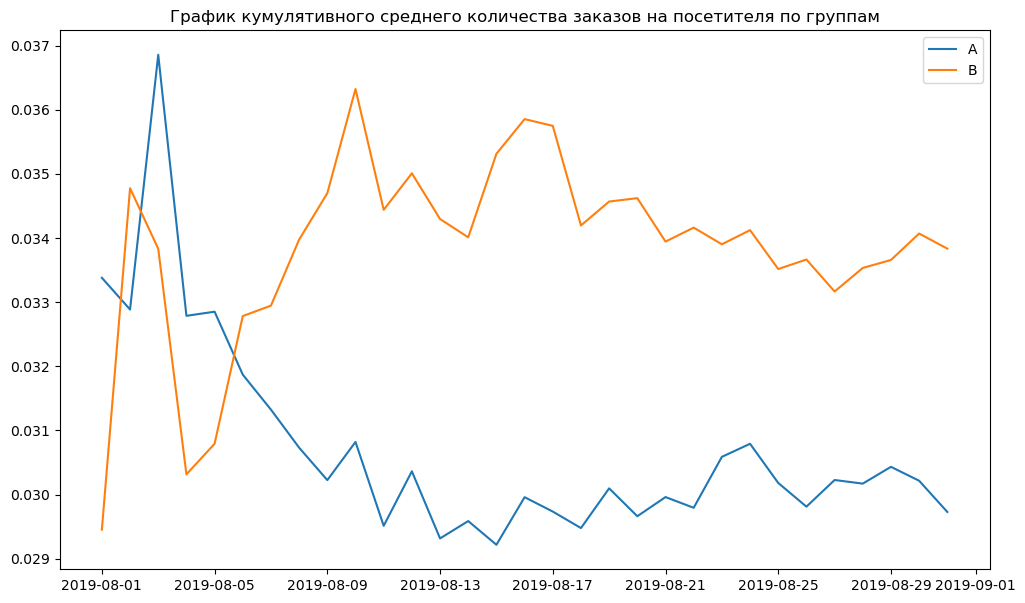

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show()

Сначал графики сильно "скачут", затем колебания становятся более умеренными. Стоит отметить, что кумулятивное среднее количество заказов на пользователя в группе B выше.

Построим график относительного изменения среднего количества заказов на пользователя.

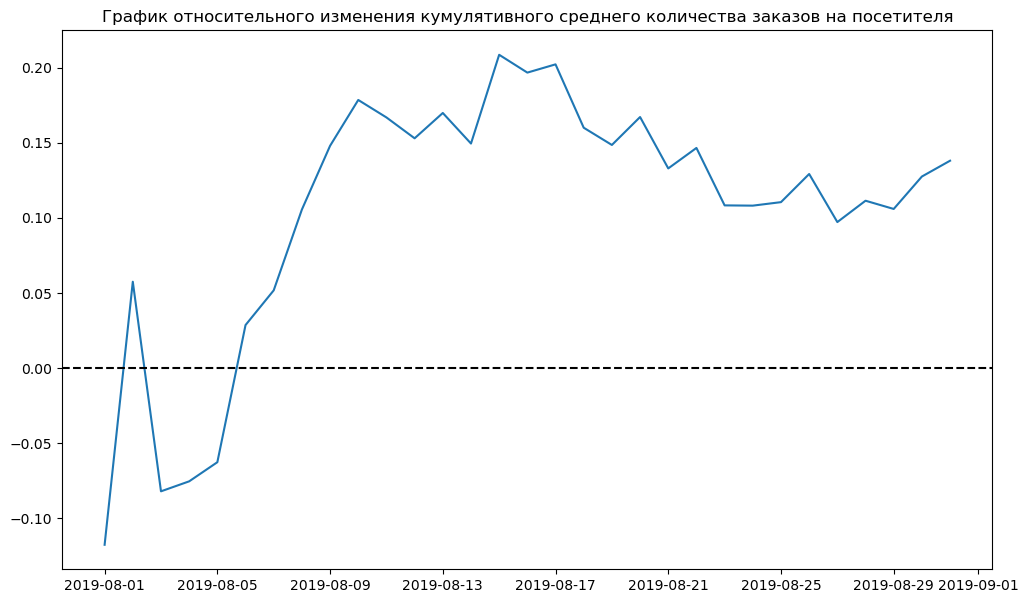

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], (data['ordersCummulativeB']/data['visitorsCummulativeB'])/(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.show()

Поначалу кривая так же скачет, однако ближе к концу амплитуда колебаний становится меньше. Тем не менее к концу рассматриваемого периода группа B начинает немного проигрывать группе A.

Теперь построим график количества заказов по пользователям.

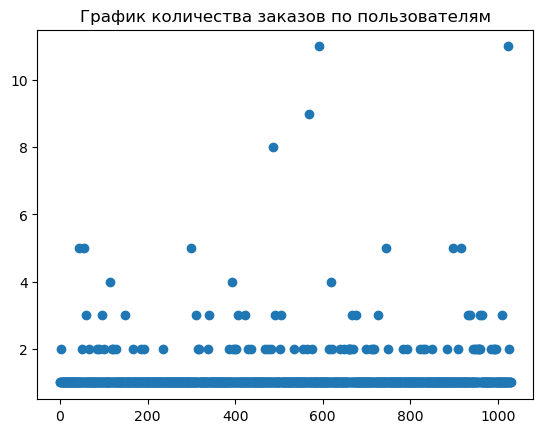

In [19]:
ordersByUsers  = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
ordersByUsers.columns = ['visitorId','orders']
plt.scatter(pd.Series(range(0,len(ordersByUsers))), ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.show()

На графике сразу заметны выбросы, лишь у небольшого количества пользователей больше 4 заказов. Наиболее типичная ситуация, когда пользователь делает 1-2 заказа.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [20]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) #считаем 95 и 99 перцентили количества заказов

[2. 4.]


Не более 5% пользователей совершили более 2-х заказов и не более 1% больше 4-х.

Теперь построим график стоимостей заказов.

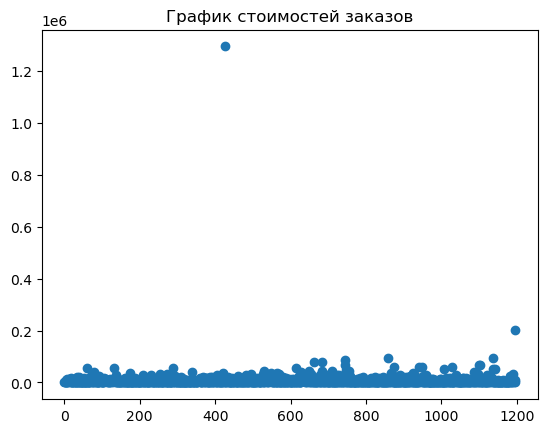

In [21]:
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('График стоимостей заказов')
plt.show()

На графике сразу видно 2 выброса. Особенно выделяется заказ стоимостю более 1 млн. Из-за особенно крупного заказа не видно других выбросов, поэтому перестроим график, убрав заказы стоимостью более 200 тыс.

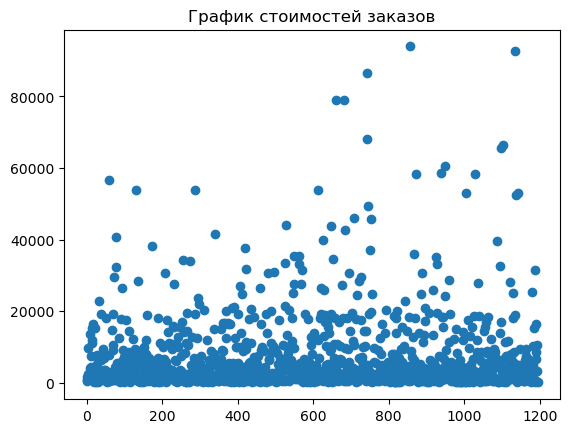

In [22]:
plt.scatter(pd.Series(range(0,len(orders.loc[orders['revenue']<200000,'revenue']))), orders.loc[orders['revenue']<200000,'revenue'])
plt.title('График стоимостей заказов')
plt.show()

Теперь заметно, что большая часть заказов стоит менее 20 тысяч.

Рассчитаем 95-й и 99-й перцентили стоимостей заказов.

In [23]:
print(np.percentile(orders['revenue'], [95, 99])) #считаем 95 и 99 перцентили количества заказов

[28000.  58233.2]


Не более 5% заказов имеют стоимость более 28 тыс. и не более 1% более 58 тыс.

Мы почистим данные от пользователей, которые делали более 4-х заказов и уберем заказы стоимостью более 40 тыс. рублей.

Нам необходимо посчитать статистическую значимость среднего количества заказов. Сформулируем гипотезы.

**H0:** Различий в среднем количестве заказов между группами нет.

**H1:** Различия в среднем количестве заказов между группами есть.

Посчитаем статистическую значимость среднего количества заказов по "сырым" данным. Для этого сначала отберем необходимые данные.

In [24]:
#собираем данные о заказах по пользователям и группам
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Создаем массивы для анализа, заполняем пользователей без заказов нулями.

In [25]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0, 
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ), 
            name='orders'
        )
    ],
    axis=0
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0, 
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ), 
            name='orders'
        )
    ],
    axis=0
)

Теперь считаем статистическую значимость для среднего количества заказов.

In [26]:
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Отклонение среднего количества заказов группы B от группы A:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Отклонение среднего количества заказов группы B от группы A: 0.138


При уровне значимости 5%, у нас есть основания отвергать нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Т.е. между группами есть разница по количеству заказов. В группе B показатель выше на 13,8%.

Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Также сформулируем гипотезы.

**H0:** Различий в среднем чеке заказа между группами нет.

**H1:** Различия в среднем чеке заказа между группами есть.

In [27]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отклонение среднего чека группы B от группы A:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Отклонение среднего чека группы B от группы A: 0.259


А вот отвергать нулевую гипотезу о том, что в среднем чеке между группами нет различий, мы не можем, так как p-value больше 5%. Средний чек группы B отличается от среднего чека группы A почти на 26%.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Для этого сначал очистим данные от выбросов. Напомню, что граница 40 тыс. по стоимости и 4 заказа.

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print("Количество пользователей:", abnormalUsers.shape[0]) #считаем количество убранных пользователей

Количество пользователей: 29


Создаем отфильтрованные массивы по группам.

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Считаем статистическую значимость. Снова сформулируем гипотезы:

**H0:** Различий в среднем количестве заказов между группами нет.

**H1:** Различия в среднем количестве заказов между группами есть.

In [30]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отклонение среднего количества заказов группы B от группы A:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.010
Отклонение среднего количества заказов группы B от группы A: 0.166


Между группами все так же остаются статистически значимые различия.

Теперь считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сформулируем гипотезы:

**H0:** Различий в среднем чеке заказа между группами нет.

**H1:** Различия в среднем чеке заказа между группами есть.

In [31]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print('Отклонение среднего чека группы B от группы A:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.612
Отклонение среднего чека группы B от группы A: 0.069


В среднем чеке нет статистически значимых различий.

## 4. Результаты анализа

В ходе проекта мы проанализировали результаты проведенного A/B-теста. Были построены графики кумулятивной выручки, кумулятивного среднего чека и его изменения, в результате чего мы выяснили, что в данных есть выбросы. В частности, имеет место заказ на большую сумму.

Также были построены графики кумулятивного среднего количества заказов и относительного изменения. На них мы увидели, что среднее количество заказов на пользователя выше в группе B. Также на графике относительного изменения мы увидели, что ближе к концу периода группа B начинает проигрывать группе A по данному показателю.

На графиках, демонстрирующих выбросы, заметны выбивающиеся из общей картины заказы по стоимости и по количеству. Мы определили 95-й и 99-й перцентили для первого и второго показателя и определили границы: не более 4-х заказов на пользователя и выручка не более 40 тыс.

Затем был проведен ряд тестов. В ходе тестов и по "сырым", и по "очищенным" данным мы выяснили, что по среднему числу заказов есть статистически значимые различия. А вот по среднему чеку статистически значимых различий нет.

В целом, мне кажется, что кривая на графике относительного изменения кумулятивного среднего количества заказов не стабилизировалась и есть отрицательная динамика. При этом кумулятивное среднее количество заказов на пользователя в группе B больше, чем в группе A. Также тест говорит о том, что есть статистически значимые различия.

Я считаю, что есть смысл продолжить проведение теста, чтобы определить как дальше будет меняться кумулятивное среднее по заказам, дождаться, когда ситуация стабилизируется. Если оно стабилизируется на указанном уровне или начнет расти, то мы сможем признать тест успешным. В противном случае мы остановим тест и признаем эксперимент неудачным.